In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from recipes_analizer import RecipesAnalizer
from basket_processor import BasketProcessor
from plots import Plots

import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
RECEIPES_FILE_TRAIN = '../Data/recipe-ingredients-dataset/train.json'
GROCERIES_FILE = '../Data/groceries/groceries.csv'
plot = Plots()

Created a list of 6714 unique ingredients from 39774 recipes
Tf-idf vectorizer has selected 194 ingredients
cuisine
british        0
irish          0
southern_us    0
Name: label, dtype: int64
cuisine
chinese       1
filipino      1
japanese      1
korean        1
thai          1
vietnamese    1
Name: label, dtype: int64
cuisine
brazilian       2
cajun_creole    2
french          2
greek           2
indian          2
italian         2
jamaican        2
mexican         2
moroccan        2
russian         2
spanish         2
Name: label, dtype: int64


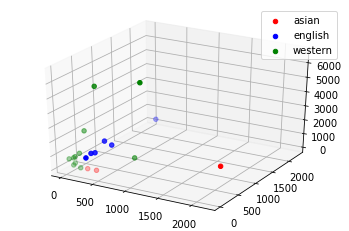

In [3]:
ra = RecipesAnalizer(source=RECEIPES_FILE_TRAIN)
recipes_df = ra.load_data()
unique_ingredients = ra.unique_ingredients(recipes_df['ingredients'])
recipes_df['ingredient_indexes'] = ra.replace_by_indexes(unique_ingredients, recipes_df['ingredients'])
tfidf_matrix = ra.tfidf_matrix(corpus=recipes_df['ingredient_indexes'])
recipes_df['cluster'], centroids = ra.cluster_recipes(tfidf_matrix, n_clusters=3)
plot.compare_cuisine(recipes_df)
vocabulary_text = [unique_ingredients[int(i)] for i in list(ra.vectorizer.vocabulary_.keys())]

Loaded 9835 baskets
There are 169 unique items
Intersection between unique items and ingredients: 13
Filtered baskets lenght 3811 out of 9835


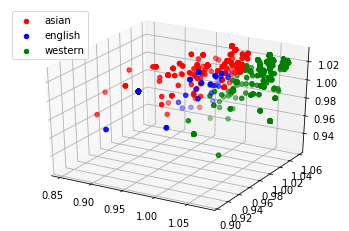

In [4]:
bp = BasketProcessor()
baskets = bp.load_groceries_data(file=GROCERIES_FILE)
unique_items = list({item for basket in baskets for item in basket})
print('There are %d unique items' % len(unique_items)) #Includes all items in baskets
bp.find_common_items(vocabulary_text, unique_items) #Performs identical string comparison 
filtered_baskets = bp.get_filtered_baskets(baskets)
#Apply the fitted TfidfVectorizer to the baskets with 'transform' method
basket_corpus = [' '.join([str(unique_ingredients.index(item)) for item in basket]) for basket in filtered_baskets]
basket_tfidf = ra.vectorizer.transform(basket_corpus).todense() #No need to learn vocabulary
#Compute euclidean distances against centroids
distances = euclidean_distances(basket_tfidf, centroids) # baskets x n_clusters
basket_labels = [np.argmin(b) for b in distances]
plot.plot3d(distances=distances, basket_labels=basket_labels)